In [31]:
# 
# df.select_dtypes(include='object')


## Import Dataset and checkout the data

In [32]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 
# Import from Scikit library 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
# 
# Load the data
bike_data = pd.read_csv("../data/bikes.csv")
# 
# See the first 5 rows
bike_data.head()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601


In [33]:
# 
# See how many values are missing
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  657 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


## Imputation
Use the median value for 'feel_temperature' and overwrite it

In [34]:
# 
# Calculate the median of the column
median_feel = bike_data["feel_temperature"].median()
# 
# Fill missing values
bike_data["feel_temperature"] = bike_data["feel_temperature"].fillna(median_feel)
# 
# See how many values are missing
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


## Interpolate
Interpolate by PADDING on the 'season' column

In [35]:
bike_data['season'] = bike_data['season'].ffill()
# 
# Check for missing values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


Interpolate by MODE on the 'season' column


To get more accurate data you can subset or filter the data to have more accurate data i.e., using season as a variable that affects 'weather_code'

In [36]:
# 
# Check for the values in 'weather_code' column
#    bike_data.weather_code.unique() is the same as bike_data['weather_code'].unique()
bike_data['weather_code'].unique()

array(['broken_clouds', 'clear', 'scattered_clouds', 'rain', nan,
       'cloudy', 'snowfall'], dtype=object)

In [37]:
# 
# Fill in the missing weather_code value with mode value
wc_mode = bike_data['weather_code'].mode()[0]
# 
# Interpolate with mode
bike_data['weather_code'] = bike_data['weather_code'].fillna(wc_mode)
# 
# Check for missing values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      730 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


## Encode Categorical values
### One-hot encoding (Dummy encoding) - creates a new column for each category

Fit transform method

obj = logreg()

obj.fit(df)

In [38]:
# 
# Pick only the columns that contain text (strings) from bike_data DataFrame.
bike_data.select_dtypes(include = 'object')

,date,weather_code,season
0,04/01/2015,broken_clouds,winter
1,05/01/2015,broken_clouds,winter
2,06/01/2015,clear,winter
3,07/01/2015,scattered_clouds,winter
4,08/01/2015,rain,winter
...,...,...,...
725,30/12/2016,cloudy,winter
726,31/12/2016,cloudy,winter
727,01/01/2017,rain,winter
728,02/01/2017,clear,winter


##### Now that we know we only have 2 columns that have the string data type, then we can encode them

In [39]:
# 
# Fetch the season data as new DataFrame
season_data: pd.Series = bike_data['season'] 
# 
# Convert season_data to a 1-column DataFrame
season_data_df: pd.DataFrame = pd.DataFrame(season_data, columns=['season'])
# 
# Instantiate a one-hot encoder object
one_hot_encoder = OneHotEncoder(sparse_output=False)    # 'sparse_output = False' makes OneHotEncoder return a dense array directly instead of the default sparse matrix 
# 
# One hot encoding for season column
ohe_array = one_hot_encoder.fit_transform(season_data_df)    # '.fit_transform(df)' takes a DataFrame NOT a series object
# 
# Get feature/column/variable names for the one-hot encoded columns (i.e., the new column names that represent the one-hot encoded categories e.g., season_summer, season_spring etc)
column_names = one_hot_encoder.get_feature_names_out(['season'])
# 
# Convert array to DataFrame and give it the feature names as column names
season_encoded_df = pd.DataFrame(ohe_array, columns=column_names)
# 
# Combine the original season column with the one-hot encoded DataFrame
season_full_df = pd.concat(
    [
        season_data_df.reset_index(drop=True),            # Ensures the indices match before concatenation.
        season_encoded_df
    ],
    axis=1
)
season_full_df.sample(10)

,season,season_autumm,season_spring,season_summer,season_winter
622,autumm,1.0,0.0,0.0,0.0
89,spring,0.0,1.0,0.0,0.0
247,autumm,1.0,0.0,0.0,0.0
122,spring,0.0,1.0,0.0,0.0
353,winter,0.0,0.0,0.0,1.0
278,autumm,1.0,0.0,0.0,0.0
585,summer,0.0,0.0,1.0,0.0
727,winter,0.0,0.0,0.0,1.0
555,summer,0.0,0.0,1.0,0.0
568,summer,0.0,0.0,1.0,0.0


In [40]:
# 
# Converting a matrix to an array in cases where we don't specify 'sparse_output=False' on OneHotEncoder(), which will make it return a sparse matrix 
# dense_array = ohe_.toarray()
# print(dense_array)

In [41]:
# 
# Combine the bike_data DataFrame to the one-hot encoded DataFrame
# Combine the original season column with the one-hot encoded DataFrame
season_full_df = pd.concat(
    [
        bike_data.reset_index(drop=True),            # Ensures the indices match before concatenation.
        season_encoded_df
    ],
    axis=1
)
season_full_df.sample(10)

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count,season_autumm,season_spring,season_summer,season_winter
308,08/11/2015,15.00,15.00,84.25,16.291667,broken_clouds,False,True,autumm,18754,1.0,0.0,0.0,0.0
11,15/01/2015,9.00,12.50,66.00,31.166667,clear,False,False,winter,22968,0.0,0.0,0.0,1.0
576,02/08/2016,20.00,20.00,85.50,17.312500,broken_clouds,False,False,summer,28593,0.0,0.0,1.0,0.0
445,24/03/2016,9.00,6.00,72.25,17.166667,rain,False,False,spring,19329,0.0,1.0,0.0,0.0
144,28/05/2015,15.00,15.00,45.75,23.208333,clear,False,False,spring,34387,0.0,1.0,0.0,0.0
652,18/10/2016,12.00,12.00,68.25,24.104167,clear,False,False,autumm,32771,1.0,0.0,0.0,0.0
153,06/06/2015,15.75,15.75,45.75,23.791667,clear,False,True,summer,32820,0.0,0.0,1.0,0.0
55,28/02/2015,9.00,6.00,85.00,23.083333,broken_clouds,False,True,winter,13529,0.0,0.0,0.0,1.0
654,20/10/2016,11.75,11.75,78.25,13.979167,broken_clouds,False,False,autumm,32344,1.0,0.0,0.0,0.0
647,13/10/2016,12.00,12.50,73.25,17.354167,clear,False,False,autumm,30587,1.0,0.0,0.0,0.0


####  Assignment: Hot encode the weather code column

### 1. Normalizing Data

1. First we visualize the data so that we know if we need to normalize the data

It is not a optional to normalize data depending on domain data (e.g., some weather data don't follow normal distribution but others do).

If the mean is far from the peak, maybe outliers are pulling it.

Depending on the insight you get, you can normalize, log-transform, or drop outliers later.

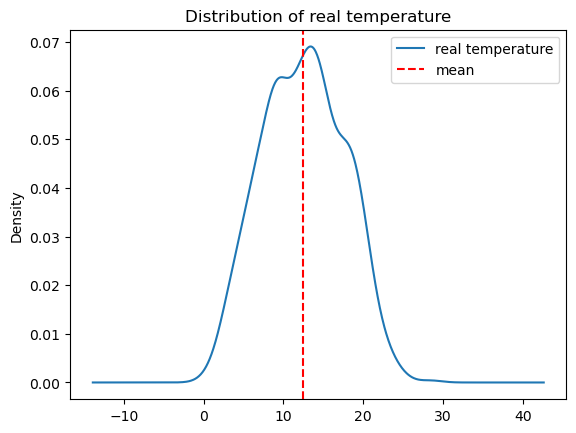

In [42]:
# 
# Create a density plot to visualize distribution
ax = season_full_df['real_temperature'].plot.density(title = 'Distribution of real temperature', label = 'real temperature')
# 
# Get the mean of 'real temperature column'
mean_real_temp = season_full_df['real_temperature'].mean()
# 
# Plot the column mean
plt.axvline(x = mean_real_temp, color = 'r', linestyle = '--', label = 'mean')
ax.legend()

##### NB:
Rarely will you have a perfect normal distribution

In [43]:
# 
# Plotting a histogram
# ax = season_full_df['real_temperature'].plot.hist(title = 'Distribution of real temperature', label = 'real temperature')

### 2. Standardize the data

StandardScaler(): standardizes your numeric data by removing the mean and scaling to unit variance.

    It transforms your column so that:

        Mean = 0

        Standard Deviation = 1

Scaling ensures: features are on the same scale and that big numbers don’t dominate smaller ones

Only use fit() on training data, and use transform() on test/validation data

By default,  StandardScaler() standardizes values to spread around 0

In [44]:
# 
# Create a Standard Scaler object
std_scaler = StandardScaler()
# 
# Standardize the real temperature column
season_full_df['scaled_real_temperature'] = std_scaler.fit_transform(X = season_full_df[['real_temperature']])

In [45]:
season_full_df[['real_temperature', 'scaled_real_temperature']]

,real_temperature,scaled_real_temperature
0,2.75,-1.914593
1,9.00,-0.685001
2,8.00,-0.881736
3,9.00,-0.685001
4,9.00,-0.685001
...,...,...
725,4.00,-1.668675
726,7.50,-0.980103
727,7.00,-1.078470
728,3.25,-1.816226


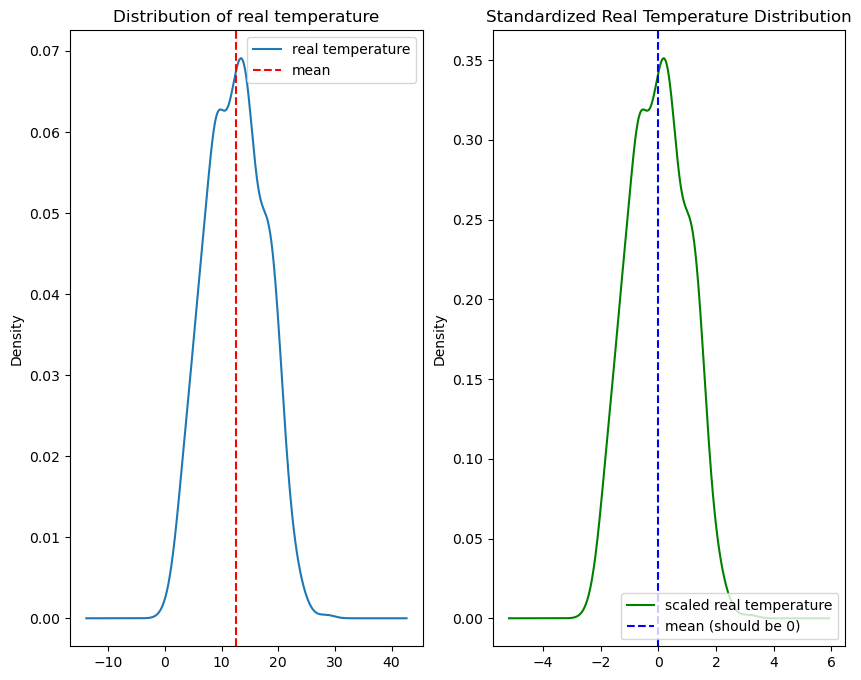

In [46]:
# 
# Create a figure object for the distribution plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8))
# Create a density plot to visualize distribution
ax1 = season_full_df['real_temperature'].plot.density(ax = ax1, title = 'Distribution of real temperature', label = 'real temperature')
# 
# Get the mean of 'real temperature column'
mean_real_temp = season_full_df['real_temperature'].mean()
# 
# Plot the column mean
ax1.axvline(x = mean_real_temp, color = 'r', linestyle = '--', label = 'mean')
ax1.legend()
# 
# Plot the standardized distribution
season_full_df['scaled_real_temperature'].plot.density(ax=ax2, label='scaled real temperature', color='green', title='Standardized Real Temperature Distribution')
mean_scaled_temp = season_full_df['scaled_real_temperature'].mean()
ax2.axvline(x=mean_scaled_temp, color='b', linestyle='--', label='mean (should be 0)')
ax2.legend(loc = 'lower right')

### Composite Transformation using ColumnTransformer
Doing the 2 steps above (encoding, normalization and standardization) in 1 step/function

Allows us to combine multiple transformations and apply them to specific columns in one step.

In [47]:
# 
# Create a column transformer object
column_transform = make_column_transformer(
    (StandardScaler(), bike_data['real_temperature']),
    (OneHotEncoder(), bike_data['season'])
)
column_transform

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 0      2.75
1      9.00
2      8.00
3      9.00
4      9.00
       ... 
725    4.00
726    7.50
727    7.00
728    3.25
729    4.50
Name: real_temperature, Length: 730, dtype: float64),
                                ('onehotencoder', OneHotEncoder(),
                                 0      winter
1      winter
2      winter
3      winter
4      winter
        ...  
725    winter
726    winter
727    winter
728    winter
729    winter
Name: season, Length: 730, dtype: object)])

### Feature Selection

This helps us figure out the columns to use to pass to the model (i.e., those that are either strongly correlated positively or negatively) 

In [48]:
# 
# Create a correlation matrix for the numerical variables (after encoding, normalizing, and standardizing the data)
num_variables = season_full_df.select_dtypes(include = 'number')
# 
# Create a correlation matrix
corr_matrix = num_variables.corr()
# 
# Make a heatmap out of the correlation matrix
corr_matrix.style.background_gradient(cmap='coolwarm')

,real_temperature,feel_temperature,humidity,wind_speed,count,season_autumm,season_spring,season_summer,season_winter,scaled_real_temperature
real_temperature,1.000000,0.931534,-0.373399,0.045599,0.669005,0.051666,-0.214927,0.677230,-0.517083,1.000000
feel_temperature,0.931534,1.000000,-0.335451,0.012961,0.636596,0.069413,-0.183810,0.604396,-0.492895,0.931534
humidity,-0.373399,-0.335451,1.000000,-0.191216,-0.539293,0.232048,-0.195850,-0.345796,0.313510,-0.373399
wind_speed,0.045599,0.012961,-0.191216,1.000000,-0.197499,-0.145818,0.047796,-0.016216,0.114190,0.045599
count,0.669005,0.636596,-0.539293,-0.197499,1.000000,0.045887,-0.061346,0.520685,-0.508584,0.669005
season_autumm,0.051666,0.069413,0.232048,-0.145818,0.045887,1.000000,-0.334534,-0.333323,-0.328479,0.051666
season_spring,-0.214927,-0.183810,-0.195850,0.047796,-0.061346,-0.334534,1.000000,-0.338221,-0.333306,-0.214927
season_summer,0.677230,0.604396,-0.345796,-0.016216,0.520685,-0.333323,-0.338221,1.000000,-0.332099,0.677230
season_winter,-0.517083,-0.492895,0.313510,0.114190,-0.508584,-0.328479,-0.333306,-0.332099,1.000000,-0.517083
scaled_real_temperature,1.000000,0.931534,-0.373399,0.045599,0.669005,0.051666,-0.214927,0.677230,-0.517083,1.000000


In [49]:
num_variables.head()

,real_temperature,feel_temperature,humidity,wind_speed,count,season_autumm,season_spring,season_summer,season_winter,scaled_real_temperature
0,2.75,0.00,93.00,7.500000,9234,0.0,0.0,0.0,1.0,-1.914593
1,9.00,7.25,81.50,8.854167,20372,0.0,0.0,0.0,1.0,-0.685001
2,8.00,5.75,79.75,16.000000,20613,0.0,0.0,0.0,1.0,-0.881736
3,9.00,5.50,81.00,19.760870,21064,0.0,0.0,0.0,1.0,-0.685001
4,9.00,6.75,79.50,20.479167,15601,0.0,0.0,0.0,1.0,-0.685001
